#Task 0 - Information from HW1

[Google Colab Link](https://colab.research.google.com/drive/1CRpz5m5P3lNN-3FVZge8Ih_6fUm03_k4?usp=sharing)

Dataset used:

[**Drug Review Dataset (Druglib.com) Data Set**](https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Druglib.com%29)

Provided by Surya Kallumadi and Felix Gräßer

Given the following parameters:


1. urlDrugName (categorical): name of drug
2. condition (categorical): name of condition
3. benefitsReview (text): patient on benefits
4. sideEffectsReview (text): patient on side effects
5. commentsReview (text): overall patient comment
6. rating (numerical): 10 star patient rating
7. sideEffects (categorical): 5 step side effect rating
8. effectiveness (categorical): 5 step effectiveness rating

We want to determine how any properties we can quantify such as sideEffects and Effectiveness will affect whether a patient feels overall positively (6-10) or negatively (1-5)  about a drug given to them. This is important becuase we want patients to have confidence that the drugs given to them work. As a hypothetical example, patients wouldn't likely want a drug with lots of sideeffects and little effectiveness.

The problem is a good logistic regression problem because we can abstract the rating scale out to make it a more general binary classification of whether patients consider a drug "effective"
or "not effective". We can then take other factors such
as sideEffect and effectiveness evaluation and then determine
if it is possible to predict perceived effectiveness or non-effectiveness based on trends in the individual factor ratings.

To stay consistent with HW1, we select accuracy as one of our chosen metrics, but will explore if we can use another metric to evaluate performance.

In [ ]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import time
import math
import warnings
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
warnings.filterwarnings("ignore")

#Loading and Processing Data

This is functionally the the same process as it was in HW1.

## Original File(s) statistics

4143 entries total

Original Training file "a1": 1407 

Original Training file "a2": 1700 

Original Test file "b": 1036

The training file had to be split into two due to parsing issues.

In [ ]:
df1a = pd.read_table('drugLibTrain_raw_p1.tsv') #, skiprows=1406
df1b = pd.read_table('drugLibTrain_raw_p2.tsv', 
                     header=None,
                     names=["Unnamed: 0",
                            "urlDrugName",
                            "rating",
                            "effectiveness",
                            "sideEffects",
                            "condition",
                            "benefitsReview",
                            "sideEffectsReview",
                            "commentsReview"])
df2 = pd.read_table('drugLibTest_raw.tsv')
print(df1a.shape)
print(df1b.shape)
print(df2.shape)

(1407, 9)
(1700, 9)
(1036, 9)


In [ ]:
df2

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
3,969,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...
4,696,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...
...,...,...,...,...,...,...,...,...,...
1031,690,accutane,7,Considerably Effective,Severe Side Effects,acne vulgaris,Detoxing effect by pushing out the system thro...,"Hairloss, extreme dry skin, itchiness, raises ...",Treatment period is 3 months/12 weeks. Dosage ...
1032,1071,proair-hfa,10,Highly Effective,No Side Effects,asthma,"The albuterol relieved the constriction, irrit...",I have experienced no side effects.,I use the albuterol as needed because of aller...
1033,681,accutane,8,Considerably Effective,Moderate Side Effects,serve acne,Serve Acne has turned to middle,"Painfull muscles, problems with seeing at night","This drug is highly teratogenic ,females must ..."
1034,2709,divigel,10,Highly Effective,No Side Effects,menopause,"My overall mood, sense of well being, energy l...",No side effects of any kind were noted or appa...,Divigel is a topically applied Bio-Identical H...


In [ ]:
#combine data for sanitizing
allframes = [df1a, df1b, df2]

dfall = pd.concat(allframes, ignore_index=True) #prevent duplicate indexed values

print(dfall.shape)

(4143, 9)


In [ ]:
dfall

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...,...
4138,690,accutane,7,Considerably Effective,Severe Side Effects,acne vulgaris,Detoxing effect by pushing out the system thro...,"Hairloss, extreme dry skin, itchiness, raises ...",Treatment period is 3 months/12 weeks. Dosage ...
4139,1071,proair-hfa,10,Highly Effective,No Side Effects,asthma,"The albuterol relieved the constriction, irrit...",I have experienced no side effects.,I use the albuterol as needed because of aller...
4140,681,accutane,8,Considerably Effective,Moderate Side Effects,serve acne,Serve Acne has turned to middle,"Painfull muscles, problems with seeing at night","This drug is highly teratogenic ,females must ..."
4141,2709,divigel,10,Highly Effective,No Side Effects,menopause,"My overall mood, sense of well being, energy l...",No side effects of any kind were noted or appa...,Divigel is a topically applied Bio-Identical H...


In [ ]:
#check to make sure multliple values aren't on same row id
dfall.loc[0,:]

Unnamed: 0                                                        2202
urlDrugName                                                  enalapril
rating                                                               4
effectiveness                                         Highly Effective
sideEffects                                          Mild Side Effects
condition                       management of congestive heart failure
benefitsReview       slowed the progression of left ventricular dys...
sideEffectsReview    cough, hypotension , proteinuria, impotence , ...
commentsReview       monitor blood pressure , weight and asses for ...
Name: 0, dtype: object

In [ ]:
#identify # of empty fields
dfall.isna().sum()

Unnamed: 0           0
urlDrugName          0
rating               0
effectiveness        0
sideEffects          0
condition            1
benefitsReview       0
sideEffectsReview    2
commentsReview       8
dtype: int64

##Initial Dataset Impressions

This is a very clean dataset overall. A quick manual review
showed that rating, effectiveness, and sideEffects 
all had populated valid values in their intended ranges.
We will not be using condition - this will be explained below.

benefitsReview, sideEffectsReview, commentsReview
all consisted of valid strings or an empty field,
likely reflecting that the patient had no additional
comment on the drug used. We will just note for now that they are all in string format.


In [ ]:
print(dfall.urlDrugName.value_counts())

lexapro            74
paxil              58
retin-a            55
synthroid          53
zoloft             52
                   ..
elmiron             1
lasix               1
zovirax-topical     1
bactrim-ds          1
prevalite           1
Name: urlDrugName, Length: 541, dtype: int64


In [ ]:
print(dfall.condition.value_counts())

depression                                            302
acne                                                  211
anxiety                                                90
insomnia                                               75
birth control                                          68
                                                     ... 
ankylosing spondalytis                                  1
opiate/heroin addiction                                 1
improvement of skin appearance, very very mild acn      1
anxiety/worry                                           1
acne scarring & hyperpigmentation                       1
Name: condition, Length: 1807, dtype: int64


##Preliminary Review of the Data

We are not particularly concerned with the first column (ID numbers)
as it will not demonstrate any trends.

There are a 541 different drug names (column 2) and 
1807 condition names (column 5) with neither having an
entry or entries that takes up a noticeable majority
of the cases. (I.e. would result in a lot of features
as it would be hard to break down or group drugs or conditions
without extensive medical knowledge.)

We are primarily interested in whether reviewing tendencies 
correlate to confidence in overall drug rating, so we drop these columns for the time being for the sake of keeping features manageable.


The rating column is numerical, but the effectiveness and sideEffects columns have their values  as strings and must be converted to ints.

We use the following conversion scale:

**"Effectiveness Strength"**

Highly Effective = 5

Considerably Effective = 4

Moderately Effective = 3 

Marginally Effective = 2

Ineffective = 1

**"Side Effectiveness Strength"**

Extremely Severe Side Effects = 5

Severe Side Effects = 4 

Moderate Side Effects = 3

Mild Side Effects = 2

No Side Effects = 1


We can  quantify the comment fields (benefitsReview
,sideEffectsReview,commentsReview) by character length, to
see if there is any correlation between how talkative a user is in their
review and the overall effectiveness. (E.g. Do people who
talk more have more complaints and thus less overall rating/confidence in a drug?) 

It is worth noting a few users left some of their comment sections completely empty. A larger but still small portion of others left comments like "See Above" or "None" to demontrate that no details were mentions. Generally, though, this would only occur on 1 or rarely 2 of the 3 comment sections of a review, so we will assess them all as separate columns to see if is indicative of a user being more positive or negative about a drug.

In [ ]:
#Print the number of "None" style 
#comments for benefits, sideeffects, and comments respectively.
#About 1 out of 20 sideEffects reviewers had a None style comment.
#The other "None" style comments or empty comments are negligible amounts.

print(
dfall.loc[dfall['benefitsReview'].isin(['none','None','NONE','None.',
                                           'See above','See Above','see above',
                                           'See above.'])].shape
)
print(
dfall.loc[dfall['sideEffectsReview'].isin(['none','None','NONE','None.',
                                           'See above','See Above','see above',
                                           'See above.'])].shape
)
print(
dfall.loc[dfall['commentsReview'].isin(['none','None','NONE','None.',
                                           'See above','See Above','see above',
                                           'See above.'])].shape
)


(56, 9)
(276, 9)
(25, 9)


##Processing Data Based on Review



In [ ]:
#Drop the unused columns based on our preliminary review.
dfall_pruned=dfall.drop(['Unnamed: 0', 'urlDrugName','condition'], axis=1)
dfall_pruned

,rating,effectiveness,sideEffects,benefitsReview,sideEffectsReview,commentsReview
0,4,Highly Effective,Mild Side Effects,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,1,Highly Effective,Severe Side Effects,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,10,Highly Effective,No Side Effects,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3,Marginally Effective,Mild Side Effects,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,2,Marginally Effective,Severe Side Effects,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...
4138,7,Considerably Effective,Severe Side Effects,Detoxing effect by pushing out the system thro...,"Hairloss, extreme dry skin, itchiness, raises ...",Treatment period is 3 months/12 weeks. Dosage ...
4139,10,Highly Effective,No Side Effects,"The albuterol relieved the constriction, irrit...",I have experienced no side effects.,I use the albuterol as needed because of aller...
4140,8,Considerably Effective,Moderate Side Effects,Serve Acne has turned to middle,"Painfull muscles, problems with seeing at night","This drug is highly teratogenic ,females must ..."
4141,10,Highly Effective,No Side Effects,"My overall mood, sense of well being, energy l...",No side effects of any kind were noted or appa...,Divigel is a topically applied Bio-Identical H...


In [ ]:
#convert effectiveness and sideEffect

effectDict = {
  "Highly Effective": 5,
  "Considerably Effective": 4,
  "Moderately Effective": 3,
  "Marginally Effective": 2,
  "Ineffective": 1
}

sideeffectDict = {
  "Extremely Severe Side Effects": 5,
  "Severe Side Effects": 4,
  "Moderate Side Effects": 3,
  "Mild Side Effects": 2,
  "No Side Effects": 1
}


dfall_pruned.loc[dfall_pruned['effectiveness'] == "Highly Effective", 'effectiveness'] = 5
dfall_pruned.loc[dfall_pruned['effectiveness'] == "Considerably Effective", 'effectiveness'] = 4
dfall_pruned.loc[dfall_pruned['effectiveness'] == "Moderately Effective", 'effectiveness'] = 3
dfall_pruned.loc[dfall_pruned['effectiveness'] == "Marginally Effective", 'effectiveness'] = 2
dfall_pruned.loc[dfall_pruned['effectiveness'] == "Ineffective", 'effectiveness'] = 1

dfall_pruned.loc[dfall_pruned['sideEffects'] == "Extremely Severe Side Effects", 'sideEffects'] = 5
dfall_pruned.loc[dfall_pruned['sideEffects'] == "Severe Side Effects", 'sideEffects'] = 4
dfall_pruned.loc[dfall_pruned['sideEffects'] == "Moderate Side Effects", 'sideEffects'] = 3
dfall_pruned.loc[dfall_pruned['sideEffects'] == "Mild Side Effects", 'sideEffects'] = 2
dfall_pruned.loc[dfall_pruned['sideEffects'] == "No Side Effects", 'sideEffects'] = 1
dfall_pruned

,rating,effectiveness,sideEffects,benefitsReview,sideEffectsReview,commentsReview
0,4,5,2,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,1,5,4,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,10,5,1,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3,2,2,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,2,2,4,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...
4138,7,4,4,Detoxing effect by pushing out the system thro...,"Hairloss, extreme dry skin, itchiness, raises ...",Treatment period is 3 months/12 weeks. Dosage ...
4139,10,5,1,"The albuterol relieved the constriction, irrit...",I have experienced no side effects.,I use the albuterol as needed because of aller...
4140,8,4,3,Serve Acne has turned to middle,"Painfull muscles, problems with seeing at night","This drug is highly teratogenic ,females must ..."
4141,10,5,1,"My overall mood, sense of well being, energy l...",No side effects of any kind were noted or appa...,Divigel is a topically applied Bio-Identical H...


In [ ]:
#a few  comments have arbitrary float values - possibly corresponding to
#an additional rating, a misunderstood rating, 
#or some kind of survery-specific code?
#we'll try and cast these reports as strings 
#to preserve their presence in the data
dfall_pruned['benefitsReview'] = dfall_pruned['benefitsReview'].apply(lambda x: len(str(x)))
dfall_pruned['sideEffectsReview'] = dfall_pruned['sideEffectsReview'].apply(lambda x: len(str(x)))
dfall_pruned['commentsReview'] = dfall_pruned['commentsReview'].apply(lambda x: len(str(x)))
dfall_pruned

,rating,effectiveness,sideEffects,benefitsReview,sideEffectsReview,commentsReview
0,4,5,2,184,197,65
1,1,5,4,178,258,62
2,10,5,1,254,42,387
3,3,2,2,598,111,158
4,2,2,4,114,150,9
...,...,...,...,...,...,...
4138,7,4,4,230,371,218
4139,10,5,1,306,35,121
4140,8,4,3,31,47,262
4141,10,5,1,162,169,306


In [ ]:
#lastly make ratings negative/positive
dfall_pruned.loc[dfall_pruned['rating'] <= 5, 'rating'] = -1
dfall_pruned.loc[dfall_pruned['rating'] > 5, 'rating'] = 1
dfall_pruned

,rating,effectiveness,sideEffects,benefitsReview,sideEffectsReview,commentsReview
0,-1,5,2,184,197,65
1,-1,5,4,178,258,62
2,1,5,1,254,42,387
3,-1,2,2,598,111,158
4,-1,2,4,114,150,9
...,...,...,...,...,...,...
4138,1,4,4,230,371,218
4139,1,5,1,306,35,121
4140,1,4,3,31,47,262
4141,1,5,1,162,169,306


In [ ]:
#Imbalance in data: note that patients 
#typically tended to be positive
#about medical drug use in the data. 
dfall_pruned.rating.value_counts(normalize=True)

 1    0.727734
-1    0.272266
Name: rating, dtype: float64

In [ ]:
#Preparing to split data

# independent variables (All other factors)
X = dfall_pruned.drop(['rating'], axis=1)
# dependent/target variable (Positive (1) or Negative (-1) opinion)
#y = dfall_pruned.rating
y = dfall_pruned['rating'].to_numpy()
y = y.reshape((y.shape[0], 1))

In [ ]:
X

,effectiveness,sideEffects,benefitsReview,sideEffectsReview,commentsReview
0,5,2,184,197,65
1,5,4,178,258,62
2,5,1,254,42,387
3,2,2,598,111,158
4,2,4,114,150,9
...,...,...,...,...,...
4138,4,4,230,371,218
4139,5,1,306,35,121
4140,4,3,31,47,262
4141,5,1,162,169,306


In [ ]:
y

array([[-1],
       [-1],
       [ 1],
       ...,
       [ 1],
       [ 1],
       [ 1]])

In [ ]:
#train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Use normalizer on each X data
transformer = Normalizer(norm='max').fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [ ]:
X_train

array([[0.00840336, 0.00560224, 0.80952381, 0.05322129, 1.        ],
       [0.01602564, 0.00641026, 0.17307692, 0.01282051, 1.        ],
       [0.00796813, 0.00398406, 1.        , 0.39840637, 0.5059761 ],
       ...,
       [0.01144165, 0.00457666, 1.        , 0.71167048, 0.60411899],
       [0.01550388, 0.01550388, 0.5503876 , 0.96511628, 1.        ],
       [0.0059952 , 0.0059952 , 0.15347722, 0.51318945, 1.        ]])

In [ ]:
X_test

array([[0.00114679, 0.00229358, 0.12614679, 1.        , 0.25860092],
       [0.01754386, 0.00350877, 1.        , 0.92982456, 0.99298246],
       [0.0152439 , 0.00609756, 0.39634146, 0.13719512, 1.        ],
       ...,
       [0.01273885, 0.00636943, 1.        , 0.61783439, 0.39490446],
       [0.00834725, 0.00166945, 0.87479132, 0.05175292, 1.        ],
       [0.02898551, 0.00724638, 1.        , 0.6884058 , 0.51449275]])

In [ ]:
print(X_train.shape)
print(X_test.shape)

(3314, 5)
(829, 5)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(3314, 1)
(829, 1)


In [ ]:
len(X_train)

3314

#Task 1 - Descision Tree

##Basic Descision Tree

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=86)
start = time.time()
clf = clf.fit(X_train, y_train)
end = time.time()
print("Time elapsed for Descision Tree fit: " + str(end - start))

Time elapsed for Descision Tree fit: 0.021248579025268555


In [ ]:
y_DesTree_train =clf.predict(X_train)
y_DesTree_train = y_DesTree_train.reshape((y_DesTree_train.shape[0], 1))
print(y_DesTree_train)
print(y_train)

[[ 1]
 [ 1]
 [ 1]
 ...
 [ 1]
 [-1]
 [-1]]
[[ 1]
 [ 1]
 [ 1]
 ...
 [ 1]
 [-1]
 [-1]]


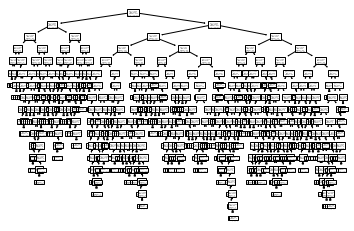

In [ ]:
#Plot the Tree
tree.plot_tree(clf)
#plt.show to prevent excess chunks of text code
plt.show()

In [ ]:
print(clf.tree_.max_depth)

17


In [ ]:
y_DesTree_train == y_train

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
#Accuracy SCore
#sklearn.metrics.accuracy_score(y_true, y_pred...
acc_s = str(accuracy_score(y_train, y_DesTree_train))
pre_s = str(precision_score(y_train, y_DesTree_train))
rec_s = str(recall_score(y_train, y_DesTree_train))

print("Train Accuracy: " + acc_s )
print("Train Precision: " + pre_s )
print("Train Recall: " + rec_s )

Train Accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0


In [ ]:
y_DesTree_test =clf.predict(X_test)
y_DesTree_test = y_DesTree_test.reshape((y_DesTree_test.shape[0], 1))
print(y_DesTree_test[0:10])
print(y_test[0:10])

[[-1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[-1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]


In [ ]:
acc_s = str(accuracy_score(y_test, y_DesTree_test))
pre_s = str(precision_score(y_test, y_DesTree_test))
rec_s = str(recall_score(y_test, y_DesTree_test))

print("Test Accuracy: " + acc_s )
print("Test Precision: " + pre_s )
print("Test Recall: " + rec_s )

Test Accuracy: 0.8673100120627262
Test Precision: 0.912396694214876
Test Recall: 0.9064039408866995


###Thoughts on the Basic Descision Tree


The tree is extremely large! This, combined with the observation of 100% train accuracy/precision/recall, suggests the algorithm is overfitting to the train set. Since the descision tree classifier will attempt to keep dividing and classifying the data until it is no longer possible, it is likely it has learned features that are specific to the train dataset and not applicable in other datasets.

##Trying Limited Max Depth

In [ ]:
#try limited max_depth
clf = tree.DecisionTreeClassifier(max_depth=5, random_state=86)
start = time.time()
clf = clf.fit(X_train, y_train)
end = time.time()
print("Time elapsed for Descision Tree fit: " + str(end - start))

Time elapsed for Descision Tree fit: 0.01426076889038086


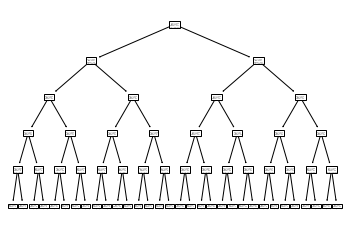

In [ ]:
tree.plot_tree(clf)
#plt.show to prevent excess chunks of text code
plt.show()

In [ ]:
print(clf.tree_.max_depth)

5


In [ ]:
y_DesTree_train =clf.predict(X_train)
y_DesTree_train = y_DesTree_train.reshape((y_DesTree_train.shape[0], 1))

In [ ]:
acc_s = str(accuracy_score(y_train, y_DesTree_train))
pre_s = str(precision_score(y_train, y_DesTree_train))
rec_s = str(recall_score(y_train, y_DesTree_train))

print("Train Accuracy: " + acc_s )
print("Train Precision: " + pre_s )
print("Train Recall: " + rec_s )

Train Accuracy: 0.8940856970428486
Train Precision: 0.906930693069307
Train Recall: 0.9517871986699917


In [ ]:
#We can confirm that the initial descision tree overfit the train/test set this way
y_DesTree_test =clf.predict(X_test)
y_DesTree_test = y_DesTree_test.reshape((y_DesTree_test.shape[0], 1))

In [ ]:
acc_s = str(accuracy_score(y_test, y_DesTree_test))
pre_s = str(precision_score(y_test, y_DesTree_test))
rec_s = str(recall_score(y_test, y_DesTree_test))

print("Test Accuracy: " + acc_s )
print("Test Precision: " + pre_s )
print("Test Recall: " + rec_s )

Test Accuracy: 0.887816646562123
Test Precision: 0.9043887147335423
Test Recall: 0.9474548440065681


###Thoughts on Modifying Limited Max Depth

Limiting the max depth helped prevent the tree from fitting to irrelevant features and our train/test accuracy now looks more reasonable. We want to be able to capture enough features so that we can apply our classification to a more general context, but not so many that we overfit.

While there was no major change in Precision, Recall on the test set noticeably improved by about 4%. This less overfit model was less likely to 'miss' positive reviews in classification.

##Trying Min Samples Split

We will try a smaller minimum count and a larger minimum count.

In [ ]:
#min_samples_split: The minimum number of samples required to split a node. 
#There exists a trade-off between smaller minimum count and a larger one. 
#Try finding out how this helps combat overfitting.
#min_samples_split: int or float, default=2

clf = tree.DecisionTreeClassifier(min_samples_split=5, random_state=86)
start = time.time()
clf = clf.fit(X_train, y_train)
end = time.time()
print("Time elapsed for Descision Tree fit: " + str(end - start))

Time elapsed for Descision Tree fit: 0.019168376922607422


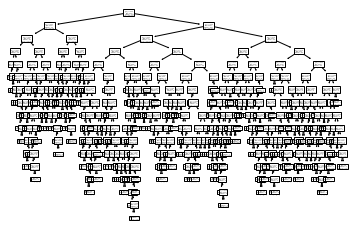

In [ ]:
tree.plot_tree(clf)
#plt.show to prevent excess chunks of text code
plt.show()

In [ ]:
print(clf.tree_.max_depth)

16


In [ ]:
y_DesTree_train =clf.predict(X_train)
y_DesTree_train = y_DesTree_train.reshape((y_DesTree_train.shape[0], 1))

In [ ]:
acc_s = str(accuracy_score(y_train, y_DesTree_train))
pre_s = str(precision_score(y_train, y_DesTree_train))
rec_s = str(recall_score(y_train, y_DesTree_train))

print("Train Accuracy: " + acc_s )
print("Train Precision: " + pre_s )
print("Train Recall: " + rec_s )

Train Accuracy: 0.97978273989137
Train Precision: 0.9895353704478862
Train Recall: 0.9825436408977556


In [ ]:
y_DesTree_test =clf.predict(X_test)
y_DesTree_test = y_DesTree_test.reshape((y_DesTree_test.shape[0], 1))

In [ ]:
acc_s = str(accuracy_score(y_test, y_DesTree_test))
pre_s = str(precision_score(y_test, y_DesTree_test))
rec_s = str(recall_score(y_test, y_DesTree_test))

print("Test Accuracy: " + acc_s )
print("Test Precision: " + pre_s )
print("Test Recall: " + rec_s )

Test Accuracy: 0.8661037394451147
Test Precision: 0.915
Test Recall: 0.9014778325123153


In [ ]:
#min_samples_split: The minimum number of samples required to split a node. 
#There exists a trade-off between smaller minimum count and a larger one. 
#Try finding out how this helps combat overfitting.
#min_samples_split: int or float, default=2

clf = tree.DecisionTreeClassifier(min_samples_split=150, random_state=86) #cannot be 1.0
start = time.time()
clf = clf.fit(X_train, y_train)
end = time.time()
print("Time elapsed for Descision Tree fit: " + str(end - start))

Time elapsed for Descision Tree fit: 0.01703500747680664


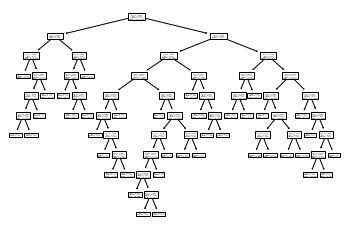

In [ ]:
tree.plot_tree(clf)
plt.show()

In [ ]:
print(clf.tree_.max_depth)

10


In [ ]:
y_DesTree_train =clf.predict(X_train)
y_DesTree_train = y_DesTree_train.reshape((y_DesTree_train.shape[0], 1))

In [ ]:
acc_s = str(accuracy_score(y_train, y_DesTree_train))
pre_s = str(precision_score(y_train, y_DesTree_train))
rec_s = str(recall_score(y_train, y_DesTree_train))

print("Train Accuracy: " + acc_s )
print("Train Precision: " + pre_s )
print("Train Recall: " + rec_s )

Train Accuracy: 0.8777911888955945
Train Precision: 0.9255635899617184
Train Recall: 0.9044056525353283


In [ ]:
y_DesTree_test =clf.predict(X_test)
y_DesTree_test = y_DesTree_test.reshape((y_DesTree_test.shape[0], 1))

In [ ]:
acc_s = str(accuracy_score(y_test, y_DesTree_test))
pre_s = str(precision_score(y_test, y_DesTree_test))
rec_s = str(recall_score(y_test, y_DesTree_test))

print("Test Accuracy: " + acc_s )
print("Test Precision: " + pre_s )
print("Test Recall: " + rec_s )

Test Accuracy: 0.8709288299155609
Test Precision: 0.919732441471572
Test Recall: 0.90311986863711


In [ ]:
#min_samples_split: The minimum number of samples required to split a node. 
#There exists a trade-off between smaller minimum count and a larger one. 
#Try finding out how this helps combat overfitting.
#min_samples_split: int or float, default=2

clf = tree.DecisionTreeClassifier(min_samples_split=500) #cannot be 1.0
start = time.time()
clf = clf.fit(X_train, y_train)
end = time.time()
print("Time elapsed for Descision Tree fit: " + str(end - start))

Time elapsed for Descision Tree fit: 0.013990640640258789


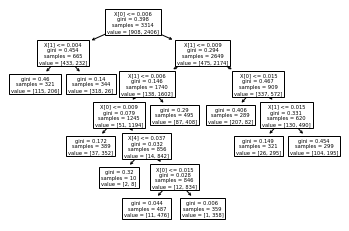

In [ ]:
tree.plot_tree(clf)
plt.show()

In [ ]:
print(clf.tree_.max_depth)

6


In [ ]:
y_DesTree_train =clf.predict(X_train)
y_DesTree_train = y_DesTree_train.reshape((y_DesTree_train.shape[0], 1))

In [ ]:
acc_s = str(accuracy_score(y_train, y_DesTree_train))
pre_s = str(precision_score(y_train, y_DesTree_train))
rec_s = str(recall_score(y_train, y_DesTree_train))

print("Train Accuracy: " + acc_s )
print("Train Precision: " + pre_s )
print("Train Recall: " + rec_s )

Train Accuracy: 0.851840675920338
Train Precision: 0.8571428571428571
Train Recall: 0.9551122194513716


In [ ]:
y_DesTree_test =clf.predict(X_test)
y_DesTree_test = y_DesTree_test.reshape((y_DesTree_test.shape[0], 1))

In [ ]:
acc_s = str(accuracy_score(y_test, y_DesTree_test))
pre_s = str(precision_score(y_test, y_DesTree_test))
rec_s = str(recall_score(y_test, y_DesTree_test))

print("Test Accuracy: " + acc_s )
print("Test Precision: " + pre_s )
print("Test Recall: " + rec_s )

Test Accuracy: 0.8516284680337757
Test Precision: 0.8616071428571429
Test Recall: 0.9507389162561576


###Thoughts on modifying Input Parameter Split

By limiting the number of samples required to create a split in the classifier, we effectively limit the depth of the tree. We can observe that while we reduced overfitting, we also reduced accuracy and precision, so the tradeoff of min samples split is that the more we use it to combat overfitting, the less accurate our model will be because it will stop creating splits after a certain threshold.

It is worth noting that if we set the min_samples_split parameters too large (i.e. splits will stop much earlier in the creation of the tree as the min sample limit is hit), accuracy and precision would actually start to worsen even if recall continued to improve. We don't want to just mitigate False Negatives, we also want to correctly identify negative reviews and minimze mistaken positive reviews (because we are judging the patient's assesment of a drug!) so the ``min_samples_split=500`` example shows why we may want to consider different metrics when assessing a model.

#Task 2 - Bag and Boost (w/KFold Cross Val)

##Bagging - Random Forest

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#create the random forest classifier
clf = RandomForestClassifier(random_state=86)

In [ ]:
#Proof of convergence
#printing multiple times in diff states to show minimal variation in stratified kfold
#KFold
# evaluate the model
for i in range(86, 92):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=i)
  #same-state allows us to redo cross val score for a diff metric
  #Accuracy
  n_scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  # report performance
  print('State %d Accuracy: %.3f (%.3f)' % (i, mean(n_scores), std(n_scores)))

  #Precision
  n_scores_P = cross_val_score(clf, X_train, y_train, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
  # report performance
  print('State %d Precision: %.3f (%.3f)' % (i, mean(n_scores_P), std(n_scores_P)))

  #Recall
  n_scores_P = cross_val_score(clf, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
  # report performance
  print('State %d Precision: %.3f (%.3f)' % (i, mean(n_scores_P), std(n_scores_P)))
  print("========")

State 86 Accuracy: 0.888 (0.017)
State 86 Precision: 0.905 (0.014)
State 86 Precision: 0.945 (0.013)
State 87 Accuracy: 0.887 (0.014)
State 87 Precision: 0.905 (0.013)
State 87 Precision: 0.943 (0.013)
State 88 Accuracy: 0.889 (0.014)
State 88 Precision: 0.907 (0.012)
State 88 Precision: 0.944 (0.014)
State 89 Accuracy: 0.888 (0.015)
State 89 Precision: 0.906 (0.015)
State 89 Precision: 0.944 (0.015)
State 90 Accuracy: 0.888 (0.015)
State 90 Precision: 0.907 (0.013)
State 90 Precision: 0.943 (0.015)
State 91 Accuracy: 0.887 (0.012)
State 91 Precision: 0.906 (0.016)
State 91 Precision: 0.943 (0.013)


In [ ]:
#perform the final fit
clf.fit(X_train, y_train)
y_Bag_train = clf.predict(X_train)
y_Bag_train = y_Bag_train.reshape((y_Bag_train.shape[0], 1))
print(y_Bag_train.shape)

(3314, 1)


In [ ]:
acc_s = str(accuracy_score(y_train, y_Bag_train))
pre_s = str(precision_score(y_train, y_Bag_train))
rec_s = str(recall_score(y_train, y_Bag_train))

print("Train Accuracy: " + acc_s )
print("Train Precision: " + pre_s )
print("Train Recall: " + rec_s )


Train Accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0


In [ ]:
y_Bag_test = clf.predict(X_test)
y_Bag_test = y_Bag_test.reshape((y_Bag_test.shape[0], 1))
print(y_Bag_test.shape)

(829, 1)


In [ ]:
acc_s = str(accuracy_score(y_test, y_Bag_test))
pre_s = str(precision_score(y_test, y_Bag_test))
rec_s = str(recall_score(y_test, y_Bag_test))

print("Test Accuracy: " + acc_s )
print("Test Precision: " + pre_s )
print("Test Recall: " + rec_s )

Test Accuracy: 0.8998793727382388
Test Precision: 0.9174603174603174
Test Recall: 0.9490968801313628


##Boosting - Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=4, random_state=86, algorithm='SAMME')

In [ ]:
#Proof of convergence
#printing multiple times in diff states to show minimal variation in stratified kfold
#KFold
# evaluate the model
for i in range(86, 92):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=i)
  #same-state allows us to redo cross val score for a diff metric
  #Accuracy
  n_scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  # report performance
  print('State %d Accuracy: %.3f (%.3f)' % (i, mean(n_scores), std(n_scores)))

  #Precision
  n_scores_P = cross_val_score(clf, X_train, y_train, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
  # report performance
  print('State %d Precision: %.3f (%.3f)' % (i, mean(n_scores_P), std(n_scores_P)))

  #Recall
  n_scores_P = cross_val_score(clf, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
  # report performance
  print('State %d Precision: %.3f (%.3f)' % (i, mean(n_scores_P), std(n_scores_P)))
  print("========")

State 86 Accuracy: 0.785 (0.023)
State 86 Precision: 0.819 (0.016)
State 86 Precision: 0.903 (0.022)
State 87 Accuracy: 0.787 (0.017)
State 87 Precision: 0.822 (0.015)
State 87 Precision: 0.903 (0.016)
State 88 Accuracy: 0.788 (0.018)
State 88 Precision: 0.823 (0.015)
State 88 Precision: 0.902 (0.018)
State 89 Accuracy: 0.786 (0.019)
State 89 Precision: 0.820 (0.013)
State 89 Precision: 0.903 (0.018)
State 90 Accuracy: 0.789 (0.019)
State 90 Precision: 0.824 (0.014)
State 90 Precision: 0.901 (0.024)
State 91 Accuracy: 0.786 (0.018)
State 91 Precision: 0.821 (0.014)
State 91 Precision: 0.903 (0.020)


In [ ]:
#perform the final fit
clf.fit(X_train, y_train)
y_Boost_train = clf.predict(X_train)
y_Boost_train = y_Boost_train.reshape((y_Boost_train.shape[0], 1))
print(y_Boost_train.shape)

(3314, 1)


In [ ]:
acc_s = str(accuracy_score(y_train, y_Boost_train))
pre_s = str(precision_score(y_train, y_Boost_train))
rec_s = str(recall_score(y_train, y_Boost_train))

print("Train Accuracy: " + acc_s )
print("Train Precision: " + pre_s )
print("Train Recall: " + rec_s )



Train Accuracy: 0.7866626433313216
Train Precision: 0.8206870517176293
Train Recall: 0.9035743973399833


In [ ]:
y_Boost_test = clf.predict(X_test)
y_Boost_test = y_Boost_test.reshape((y_Boost_test.shape[0], 1))
print(y_Boost_test.shape)

(829, 1)


In [ ]:
accuracy_score(y_test, y_Boost_test)
acc_s = str(accuracy_score(y_test, y_DesTree_test))
pre_s = str(precision_score(y_test, y_DesTree_test))
rec_s = str(recall_score(y_test, y_DesTree_test))

print("Test Accuracy: " + acc_s )
print("Test Precision: " + pre_s )
print("Test Recall: " + rec_s )

Test Accuracy: 0.8516284680337757
Test Precision: 0.8616071428571429
Test Recall: 0.9507389162561576


#Thoughts on Bagging and Boosting

Our instances in which we used validation demonstrated that Random Forest and AdaBoost would both be suitable algorithms to handle classifying our drug review data. [However, validation only assesses training data and cannot tell us if we are overfitting or underfitting data.](https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f) We witness why this is a problem in in this section.

Unfortunately, when used in practice the Random Forest classifier suffered overfitting. What likely happened is that because our dataset is extremely imbalanced in favor of positive results, the trees in the algorithm overfit in a manner similar to the tree in the "Basic Descision Tree" section of Task 1 - making a large tree based on features specific to the train dataset. 

We've seen over the course of investigating this problem that there is a noticeable difference in Recall when we use more succesful model configurations, i.e. misclassified false negatives are a recurring problem in the dataset. The use of weakness to combat mis-classified data points was successful in producing high accuracy/prediction/recall values without overfitting comparable to our Min Samples Split.

# Task 3 - Comparisons and Metrics



###What Metric was chosen to try and evaluate the three algorithms? What other Metric could we have chosen?

We reused Accuracy in the interest of observing how the chosen algorithms compared to our approach in Homework 1. A substantial improvement in accuracy was observed when using Descision Trees baesed methods, demonstrating around 80-90% test accuracy in meaningful results  as opposed to gradient descent having accuracy values between 50-70%. 


Our data isn't inherently balanced and has a heavy skew towards reviews with positive responses, so accuracy might miss out on the existence of false positives (which in a practical scenario would mean the the model incorrectly identified a negative patient reaction to a drug as a positive one.) With this in mind, precision was selected as an alternative metric. 


###How Suitable was the Metric? Proof of how this other Metric impacts the results

Precision did not vary meaningfully with our use of different methods- as far as we could tell, the different descision tree methods were still performing similarly in terms of dealing with false positives. 
Recall was added as an additional metric to help determine if there was any difference in terms of how many false negatives were being identified, i.e. if there were any positive reactions to drugs that were being incorrectly identified as negatives. Here we were able to observe that measures to combat overfitting on the dataset generally resulted in increase of notceable increase recall, likely due to positive reviews in the test dataset having combinations of ratings and review length that were not present in the train dataset. At the same time restricting the model's complexity too much could start to lower the overall accuracy and precision even while the recall increased. So evaluating purely by recall would likely have led us to models that underfit. This shows that it is important to check a model's perfomance via multiple metrics.

